<div class="output_png output_subarea output_execute_result">
<center>
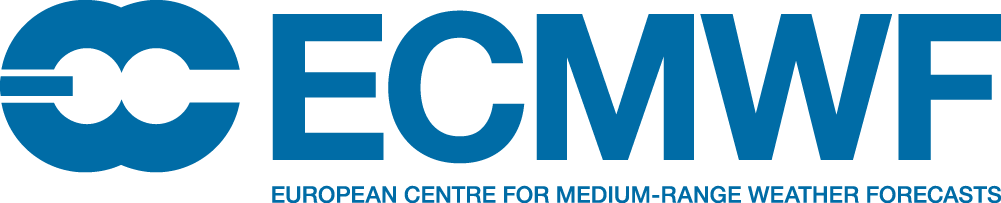</center>
</div>

# 	Probabilities (Day 10-15): 2m temperature < 0 C

This notebook will provide you guidance how to explore and plot ECMWF open dataset to produce the map from the ECMWF open charts web product.  
The original product can be found on this link: https://apps.ecmwf.int/webapps/opencharts/products/medium-2t-long-probability


<div class="output_png output_subarea output_execute_result">
<center>
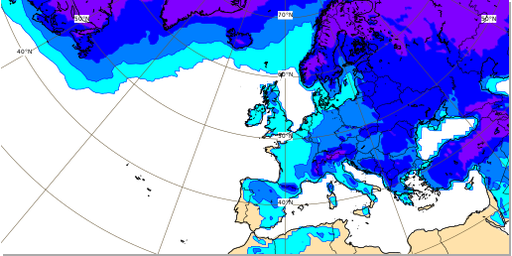</center>
</div>

The full list of available Open data products can be found [here](https://www.ecmwf.int/en/forecasts/datasets/open-data), and more information can be found in the [User documentation](https://confluence.ecmwf.int/display/UDOC/ECMWF+Open+Data+-+Real+Time).  

Access to ECMWF Open data is governed by the Creative Commons CC-BY-4.0 licence and associated [Terms of Use](https://apps.ecmwf.int/datasets/licences/general/).  

<sub> In applying this licence, ECMWF does not waive the privileges and immunities granted to it by virtue of its status as an intergovernmental organisation nor does it submit to any jurisdiction </sub>

To find out how to obtain the access to the full forecast dataset at higher resolution please visit our [Access page](https://www.ecmwf.int/en/forecasts/accessing-forecasts).

## Retrieve Data
This product takes in input 1 parameter:

* [2 metre temperature](https://apps.ecmwf.int/codes/grib/param-db/?id=167)

In this example, we will use: 
- **ecmwf.opendata** Client to download the data
- **ecmwf.data** library to read and process the data (calculate the speed and probabilities)
- **ecmwf.geomaps** to plot the result

First we need to install them in the current Jupyter kernel:  
<div class="alert alert-block alert-info">
<b>Note:</b> If you are running the notebook on MyBinder or already have the libraries installed, go directly to importing the libraries.
</div>
<div class="alert alert-block alert-info">
<b>Note:</b> If you don't have these libraries installed, click on three dots below, uncomment the code and run the next cell.
</div>

In [1]:
#import sys
#!{sys.executable} -m pip install ecmwf-data ecmwf-opendata git+https://github.com/ecmwf/ecmwf-geomaps.git

In [2]:
import ecmwf.data as ecdata
from ecmwf.geomaps import GeoMap
from ecmwf.opendata import Client

In [3]:
client = Client("ecmwf", beta=True)

In [4]:
parameters = ['2t']
filename = 'medium-2t-long-probability.grib'
filename

'medium-2t-long-probability.grib'

To calculate the probability of 2m Temperature < 0℃ in period from day 5 to day 10 in the forecast, we need to retrieve all the ensemble members and all the steps from 240 to 360.  
Setting the **type** to **ef** will download all 50 ensemble members as well as control forecast.

In [5]:
steps=list(range(240,366,6))

client.retrieve(
    date=-2,
    time=0,
    step=steps,
    stream="enfo",
    type="ef",
    levtype="sfc",
    param=parameters,
    target=filename
)

{'date': '-2', 'time': '0', 'step': '240', 'stream': 'enfo', 'type': 'ef', 'resol': '0p4-beta', '_url': 'https://ai4edataeuwest.blob.core.windows.net/ecmwf', 'extension': 'grib2'}
{'date': '-2', 'time': '0', 'step': '246', 'stream': 'enfo', 'type': 'ef', 'resol': '0p4-beta', '_url': 'https://ai4edataeuwest.blob.core.windows.net/ecmwf', 'extension': 'grib2'}
{'date': '-2', 'time': '0', 'step': '252', 'stream': 'enfo', 'type': 'ef', 'resol': '0p4-beta', '_url': 'https://ai4edataeuwest.blob.core.windows.net/ecmwf', 'extension': 'grib2'}
{'date': '-2', 'time': '0', 'step': '258', 'stream': 'enfo', 'type': 'ef', 'resol': '0p4-beta', '_url': 'https://ai4edataeuwest.blob.core.windows.net/ecmwf', 'extension': 'grib2'}
{'date': '-2', 'time': '0', 'step': '264', 'stream': 'enfo', 'type': 'ef', 'resol': '0p4-beta', '_url': 'https://ai4edataeuwest.blob.core.windows.net/ecmwf', 'extension': 'grib2'}
{'date': '-2', 'time': '0', 'step': '270', 'stream': 'enfo', 'type': 'ef', 'resol': '0p4-beta', '_ur

## Reading and processing the data
Now we can use **ecmwf.data** to read the file.

In [6]:
data = ecdata.read(filename)

The **describe()** function will give us the overview of the dataset.  

In [7]:
data.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
2t,heightAboveGround,2,20220116,0,"240,246,...","0,1,...",167,od,enfo,"cf,pf",0001


And specifying the parameter shortName in the describe function, we can get more detailed information about the data.

In [8]:
data.describe('2t')

shortName,2t
name,2 metre temperature
paramId,167
units,K
typeOfLevel,heightAboveGround
level,2
date,20220116
time,0
step,"240,246,252,258,264,270,276,282,288,294,300,306,312,318,324,330,336,342,348,354,360"
number,"0,1,10,11,12,13,14,15,16,17,18,19,2,20,21,22,23,24,25,26,27,28,29,3,30,31,32,33,34,35,36,37,38,39,4,40,41,42,43,44,45,46,47,48,49,5,50,6,7,8,9"
class,od


We can use **ls()** function to list all the fields in the file we downloaded.

In [9]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,2t,heightAboveGround,2,20220116,0,240,pf,33,regular_ll
1,ecmf,2t,heightAboveGround,2,20220116,0,240,pf,46,regular_ll
2,ecmf,2t,heightAboveGround,2,20220116,0,240,pf,28,regular_ll
3,ecmf,2t,heightAboveGround,2,20220116,0,240,pf,44,regular_ll
4,ecmf,2t,heightAboveGround,2,20220116,0,240,pf,37,regular_ll
...,...,...,...,...,...,...,...,...,...,...
1066,ecmf,2t,heightAboveGround,2,20220116,0,360,pf,18,regular_ll
1067,ecmf,2t,heightAboveGround,2,20220116,0,360,pf,49,regular_ll
1068,ecmf,2t,heightAboveGround,2,20220116,0,360,pf,12,regular_ll


First we convert to Celsius and then make a mask of temperature <0℃. (Of course we could have made a mask data<273.15 as well)

In [10]:
data_C = data - 273.15

In [11]:
t_mask = data_C < 0

Now we can calculate the probability as mean of the mask of all ensemble members

In [12]:
prob_t = (ecdata.mean(t_mask) * 100)

## Plotting the data
And finally, we can plot the data on the map. 

Magics-warning: description is not a known keyword


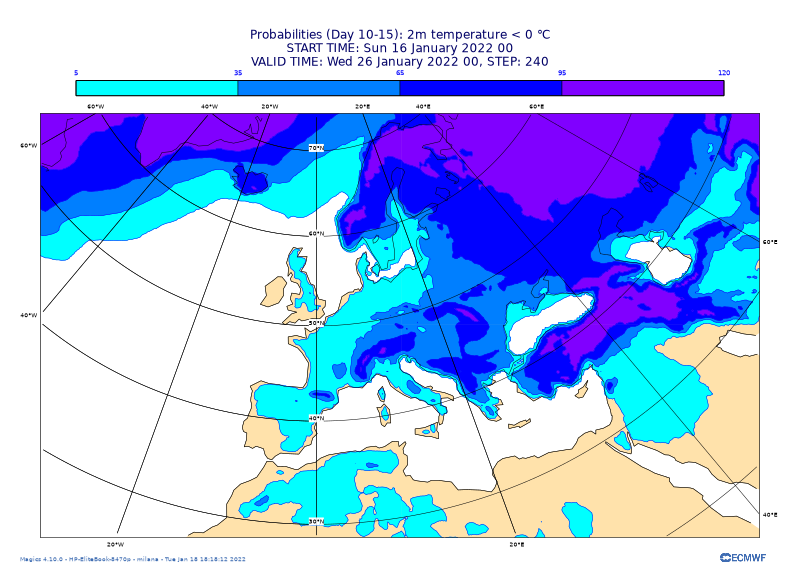

In [13]:
fig = GeoMap(area_name='europe', preset='background-foreground')

fig.contour_lines(prob_t, preset="sh_blup_f0t100lst")

fig.title(["Probabilities (Day 10-15): 2m temperature < 0 ℃",
           "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H'/> ",
           "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H' />, STEP: <grib_info key='step'/>"])
fig.legend()
fig.show()